## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview

combined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
len(combined_df["Mouse ID"].unique())


249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mice = combined_df.loc[combined_df.duplicated(subset = ["Mouse ID", "Timepoint"]),"Mouse ID"].unique()
dup_mice




array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse = combined_df.loc[combined_df["Mouse ID"] == "g989"]

duplicate_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_df[combined_df["Mouse ID"].isin(dup_mice)==False]

clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
len(clean_df["Mouse ID"].unique())

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumor_mean = clean_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
tumor_median = clean_df.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
tumor_var = clean_df.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
tumor_sd = clean_df.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
tumor_sem = clean_df.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]
# # This method is the most straighforward, creating multiple series and putting them all together at the end.

summary_table = pd.DataFrame({
    "Tumor Mean": tumor_mean,
    "Tumor Median": tumor_median,
    "Tumor Variance": tumor_var,
    "Tumor Standard Dev": tumor_sd,
    "Tumor Standard Error": tumor_sem
})

summary_table

,Tumor Mean,Tumor Median,Tumor Variance,Tumor Standard Dev,Tumor Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
tumor_table = clean_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})

tumor_table

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<AxesSubplot:title={'center':'Mice per Drug Regimen Study'}, xlabel='Drug Regimen'>

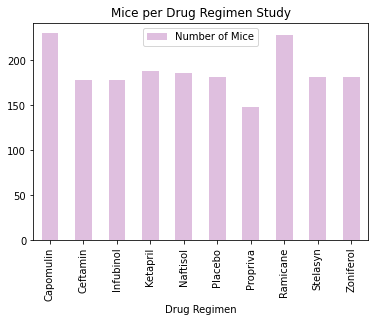

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
total_mice_per_study = clean_df.groupby("Drug Regimen")

mice_per_study_df = pd.DataFrame ({
    "Number of Mice": total_mice_per_study["Drug Regimen"].count()
    
})
mice_per_study_df
mice_per_study_df.plot(kind='bar',title = "Mice per Drug Regimen Study", color = "purple", alpha = .25)

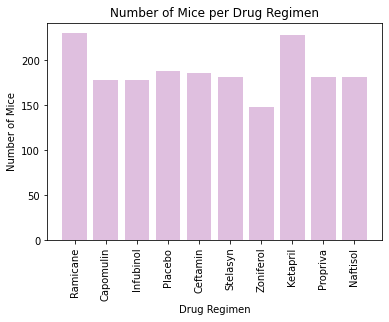

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

num_mice = total_mice_per_study["Drug Regimen"].count()
x_axis = clean_df["Drug Regimen"].unique()
plt.bar(x_axis, num_mice, color = 'purple', alpha = .25)
plt.title("Number of Mice per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.xticks(rotation=90)

plt.show()



array([<AxesSubplot:ylabel='Number per Gender'>], dtype=object)

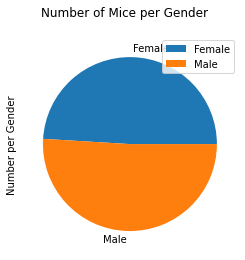

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender = clean_df.groupby("Sex")

gender_df = pd.DataFrame({
    "Number per Gender": gender["Sex"].count()
})

gender_df.plot(kind='pie',subplots=True, title="Number of Mice per Gender")

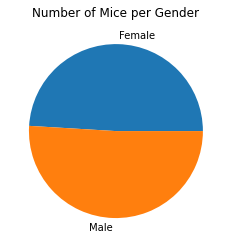

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
num_of_mice = gender["Sex"].count()
plt.pie(num_of_mice, labels = gender["Sex"].first())
plt.title("Number of Mice per Gender")

plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
best_treatments = clean_df.loc[(clean_df["Drug Regimen"] == "Capomulin") |
                               (clean_df["Drug Regimen"] == "RamiCane")|
                              (clean_df["Drug Regimen"] == "Infubinol")|
                              (clean_df["Drug Regimen"] == "Ceftamin")]
# Start by getting the last (greatest) timepoint for each mouse
mouse_group = best_treatments.groupby("Mouse ID")
mouse_df = pd.DataFrame ({
    "Timepoint": mouse_group["Timepoint"].max()
})

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
final_volume = pd.merge(mouse_df, clean_df, on=["Mouse ID","Timepoint"],  how="left")
final_volume = final_volume[["Mouse ID", "Timepoint", "Drug Regimen", "Tumor Volume (mm3)"]]
final_volume

,Mouse ID,Timepoint,Drug Regimen,Tumor Volume (mm3)
0,a203,45,Infubinol,67.973419
1,a251,45,Infubinol,65.525743
2,a275,45,Ceftamin,62.999356
3,a577,30,Infubinol,57.031862
4,a685,45,Infubinol,66.083066
...,...,...,...,...
70,y163,45,Infubinol,67.685569
71,y769,45,Ceftamin,68.594745
72,y793,45,Capomulin,31.896238
73,y865,45,Ceftamin,64.729837


In [29]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = tumor_volume.quantile([.25,.50,.75])

lowerq = quartiles[.25]
upperq = quartiles[.75]
iqr = upperq-lowerq
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
for treatment in treatments:
    
    drug_data = final_volume.loc[final_volume["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]  
    tumor_vol_data.append(drug_data)
    
    quartiles = drug_data.quantile([.25,.50,.75])

    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq-lowerq
    
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    
    
    
#     subset_df = pd.DataFrame({
#         "Drug Regimen": treatment,
#         "Volume": tumor_vol_data.sum()
        
#     })
    
# subset_df
drug_data

2     62.999356
6     45.000000
7     56.057749
9     55.742829
15    48.722078
19    47.784682
25    61.849023
26    68.923185
29    67.748662
30    57.918381
32    46.784535
33    59.851956
34    64.299830
40    59.741901
43    61.433892
45    64.192341
53    45.000000
54    52.925348
55    45.000000
62    67.527482
66    45.000000
68    64.634949
69    61.386660
71    68.594745
73    64.729837
Name: Tumor Volume (mm3), dtype: float64

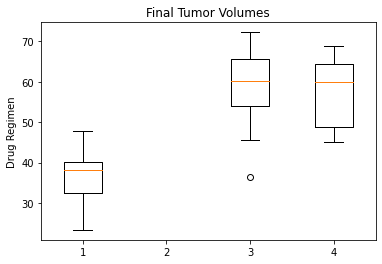

In [37]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title("Final Tumor Volumes")
ax1.set_ylabel("Drug Regimen")
ax1.boxplot(tumor_vol_data)

plt.show()

## Line and Scatter Plots

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
